# Proyecto 4

Integrantes: Bryan Martínez, Adriana Palacios, Esteban Cárcamo, y Nico Concua

Un concursante debe elegir 1 puerta entre 3 (todas cerradas); el premio consiste en llevarse lo que se encuentra detrás de la puerta elegida. Se sabe con certeza que tras una de ellas hay un premio, y tras las otras dos no hay premio.

Una vez que el concursante haya elegido una puerta y comunicado su elección a los presentes, el presentador, que sabe lo que hay detrás de cada puerta, abrirá una de las otras dos, en la que no habrá premio. A continuación, le da la opción al concursante de cambiar, si lo desea, de puerta.

## Problema 1

¿Debe el concursante mantener su elección original o escoger la otra puerta?

Se gana el premio 33374 veces al quedarse.
Se gana el premio 66626 veces al moverse de puerta.


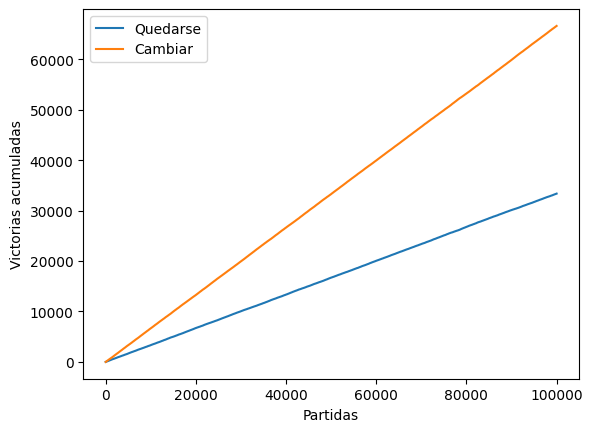

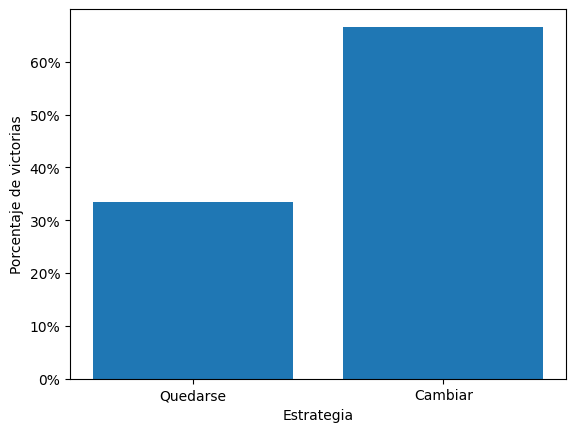

Se gana el 33% al quedarse.
Se gana el 67% al moverse de puerta.


In [15]:
import random
import matplotlib.pyplot as plt

lista = []
random.seed(2025)

for i in range(100000):
    lista.append(random.random())

# si esta entre 0 y 1/3 se queda en la primera posición
# si esta entre 1/3 y 2/3 se queda en la segunda posición
# si esta entre 2/3 y 1 se queda en la tercera posición
resultados_quedarse = []
random.seed(2025)
for i in lista:
    posicion_premio = random.randint(0,2)
    eleccion = 0
    if i < 1/3:
        eleccion = 0
    elif i < 2/3:
        eleccion = 1
    else:
        eleccion = 2

    if eleccion == posicion_premio:
        resultados_quedarse.append(1)
    else:
        resultados_quedarse.append(0)

cantidad_ganando_quedarse = 0
for i in resultados_quedarse:
    if i == 1:
        cantidad_ganando_quedarse += 1

print("Se gana el premio " + str(cantidad_ganando_quedarse) + " veces al quedarse.")

# Estrategia de cambiar de lugar tras la elección
resultados_cambiar = []
random.seed(2025)
for i in lista:
    posicion_premio = random.randint(0,2)
    eleccion = 0
    if i < 1/3:
        eleccion = 0
    elif i < 2/3:
        eleccion = 1
    else:
        eleccion = 2

    posicion_presentador = ({0, 1, 2} - {eleccion, posicion_premio}).pop()
    posicion_concursante = ({0, 1, 2} - {eleccion, posicion_presentador}).pop()

    if posicion_premio == posicion_concursante:
        resultados_cambiar.append(1)
    else:
        resultados_cambiar.append(0)
    

cantidad_ganando_moverse = 0
for i in resultados_cambiar:
    if i == 1:
        cantidad_ganando_moverse += 1

print("Se gana el premio " + str(cantidad_ganando_moverse) + " veces al moverse de puerta.")

###########################################################################################################
# Grafico de victorias acumuladas
ganancias_quedarse = []
cant_ganados = 0
for i in resultados_quedarse:
    cant_ganados += i
    ganancias_quedarse.append(cant_ganados)

ganancias_cambiar = []
cant_ganados = 0
for i in resultados_cambiar:
    cant_ganados += i
    ganancias_cambiar.append(cant_ganados)

plt.plot(ganancias_quedarse, label = "Quedarse")
plt.plot(ganancias_cambiar, label = "Cambiar")
plt.xlabel("Partidas")
plt.ylabel("Victorias acumuladas")
plt.legend()
plt.show()

# Porcentajes de victorias en grafico de barras
porcentaje_quedarse = cantidad_ganando_quedarse/100000
porcentaje_cambiar = (cantidad_ganando_moverse)/100000

plt.bar(["Quedarse", "Cambiar"], [porcentaje_quedarse, porcentaje_cambiar])
plt.xlabel("Estrategia")
plt.ylabel("Porcentaje de victorias")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x*100)))
plt.show()

print("Se gana el {:.0f}% al quedarse.".format(porcentaje_quedarse*100))
print("Se gana el {:.0f}% al moverse de puerta.".format(porcentaje_cambiar*100))
